# Kitabxanalar

In [450]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,KFold,GridSearchCV,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from warnings import filterwarnings
filterwarnings("ignore")
%matplotlib inline

In [451]:
#datanı proyekte daxil edirik.
data = pd.read_csv("health.csv")

In [452]:
df = data.copy()

In [453]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [454]:
#datan tiplerinə baxırıq.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [455]:
#Person ID kolumunu atırıq.
df.drop(columns = "Person ID",axis = 1,inplace = True)

In [456]:
#Numeric sütunların statistik göstəricilərinə baxırıq.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.0,59.0
Sleep Duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.8,8.5
Quality of Sleep,374.0,7.312834,1.196956,4.0,6.00,7.0,8.0,9.0
Physical Activity Level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.0,90.0
Stress Level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.0,8.0
Heart Rate,374.0,70.165775,4.135676,65.0,68.00,70.0,72.0,86.0
Daily Steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.0,10000.0


In [457]:
#kategorik sütunların statistik göstəricilərinə baxırıq.
df.select_dtypes(include="object").describe().T

,count,unique,top,freq
Gender,374,2,Male,189
Occupation,374,11,Nurse,73
BMI Category,374,4,Normal,195
Blood Pressure,374,25,130/85,99
Sleep Disorder,374,3,None,219


In [458]:
#sütunlar üzrə null dəyərələrin saylna baxırıq.
df.isnull().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [459]:
#təkrarlanan sütunlara baxırıq.
df[df.duplicated()]

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
11,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [460]:
#təkrarlanan sütunları atırıq.
df.drop_duplicates(inplace=True)

In [461]:
df.shape

(132, 12)

In [462]:
#Hər bir kategorik sütun üçün unique dəyərlərinə və saylarına baxırıq.
for col in df.select_dtypes(include = "object").columns:
    print(f"Column name: {col}",end="\n\n")
    print(df[col].value_counts())
    print(f"\n{'-'*30}\n")

Column name: Gender

Male      67
Female    65
Name: Gender, dtype: int64

------------------------------

Column name: Occupation

Nurse                   29
Doctor                  24
Engineer                22
Teacher                 15
Lawyer                  15
Accountant              11
Salesperson              9
Software Engineer        3
Scientist                2
Sales Representative     1
Manager                  1
Name: Occupation, dtype: int64

------------------------------

Column name: BMI Category

Normal           57
Overweight       52
Normal Weight    16
Obese             7
Name: BMI Category, dtype: int64

------------------------------

Column name: Blood Pressure

130/85    28
140/95    21
120/80    18
125/80    18
115/75     9
135/90     7
140/90     3
132/87     3
125/82     3
126/83     2
129/84     2
135/88     2
128/85     2
117/76     2
130/86     2
128/84     1
131/86     1
115/78     1
119/77     1
121/79     1
118/76     1
122/80     1
142/92     1
139/91

In [463]:
#Hər bir Numeric sütun üçün unique dəyərlərinə və saylarına baxırıq.
for col in df.select_dtypes(include=['int64',"float64"]).columns:
    print(f"Column name: {col}",end="\n\n")
    print(df[col].value_counts())
    print(f"\n{'-'*30}\n")

Column name: Age

43    11
36     8
29     7
44     7
30     6
31     6
32     6
35     6
59     5
39     5
45     5
41     5
37     5
38     5
50     5
49     5
53     4
33     4
51     4
52     3
57     3
42     3
28     3
48     2
40     2
54     2
55     1
56     1
34     1
58     1
27     1
Name: Age, dtype: int64

------------------------------

Column name: Sleep Duration

7.2    11
6.5    10
6.1     9
6.0     9
7.8     8
7.1     7
7.7     6
8.1     6
6.6     6
7.6     6
6.4     5
6.2     5
7.3     4
8.0     4
6.9     3
8.5     3
6.8     3
8.4     3
8.3     3
8.2     3
7.4     3
7.5     3
7.9     3
6.3     3
5.9     3
6.7     2
5.8     1
Name: Sleep Duration, dtype: int64

------------------------------

Column name: Quality of Sleep

6    36
8    35
7    29
9    22
5     7
4     3
Name: Quality of Sleep, dtype: int64

------------------------------

Column name: Physical Activity Level

75    23
60    22
30    21
90    21
45    20
40     5
35     4
55     4
50     3
42     2
70

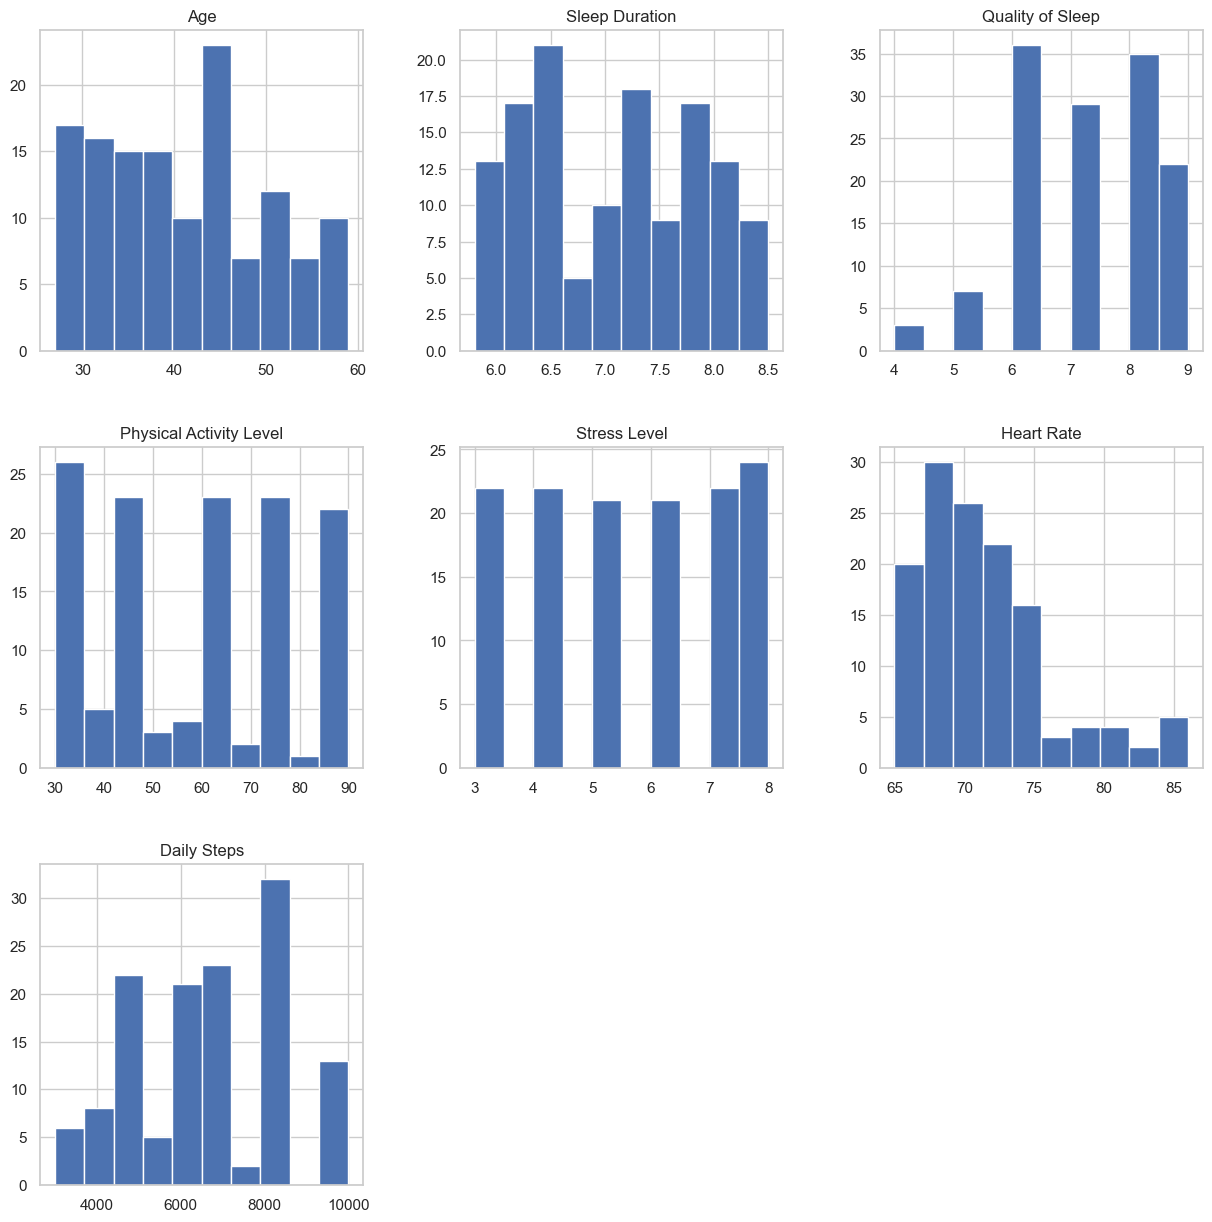

In [464]:
#Hər bir Numeric sütunun dağılımlarına baxırıq.
df.hist(figsize=(15,15));

## Sütunların Analizi

In [465]:
#Cinslərinə və Vəzifələrinə görə insanları necə kategoriyalara bölündüklərini analiz edirik.
df.groupby(["Gender","Occupation"])[["Heart Rate","Age","Sleep Duration","Quality of Sleep",\
                                       "Physical Activity Level","Stress Level","Daily Steps"]].mean()

Heart Rate        Age  Sleep Duration  \
Gender Occupation                                                    
Female Accountant             69.200000  40.100000        7.130000   
       Doctor                 65.000000  56.000000        8.200000   
       Engineer               65.000000  52.555556        8.400000   
       Lawyer                 79.500000  38.500000        7.150000   
       Manager                75.000000  45.000000        6.900000   
       Nurse                  72.862069  48.241379        6.965517   
       Scientist              78.500000  33.500000        6.000000   
       Teacher                67.000000  41.909091        6.781818   
Male   Accountant             68.000000  32.000000        7.200000   
       Doctor                 72.000000  32.304348        7.000000   
       Engineer               70.384615  40.076923        7.384615   
       Lawyer                 70.153846  39.230769        7.415385   
       Sales Representative   85.000000  28.000000        5.900000   
       Salesperson            72.000000  43.333333        6.422222   
       Software Engineer      77.333333  30.000000        6.500000   
       Teacher                75.000000  34.000000        6.550000   

                             Quality of Sleep  Physical Activity Level  \
Gender Occupation                                                        
Female Accountant                    7.900000                58.500000   
       Doctor                        9.000000                90.000000   
       Engineer                      9.000000                30.000000   
       Lawyer                        7.000000                55.000000   
       Manager                       7.000000                55.000000   
       Nurse                         7.068966                73.172414   
       Scientist                     5.000000                41.000000   
       Teacher                       7.181818                47.727273   
Male   Accountant                    8.000000                50.000000   
       Doctor                        6.652174                56.739130   
       Engineer                      7.538462                67.076923   
       Lawyer                        7.846154                71.153846   
       Sales Representative          4.000000                30.000000   
       Salesperson                   6.000000                45.000000   
       Software Engineer             6.000000                44.000000   
       Teacher                       5.750000                37.500000   

                             Stress Level   Daily Steps  
Gender Occupation                                        
Female Accountant                4.700000   6880.000000  
       Doctor                    3.000000  10000.000000  
       Engineer                  3.000000   5000.000000  
       Lawyer                    5.500000   4400.000000  
       Manager                   5.000000   5500.000000  
       Nurse                     5.758621   7558.620690  
       Scientist                 7.000000   5350.000000  
       Teacher                   4.454545   6181.818182  
Male   Accountant                6.000000   7000.000000  
       Doctor                    6.695652   6921.739130  
       Engineer                  5.076923   6600.000000  
       Lawyer                    5.076923   7484.615385  
       Sales Representative      8.000000   3000.000000  
       Salesperson               7.000000   6000.000000  
       Software Engineer         6.333333   5066.666667  
       Teacher                   6.500000   4675.000000

In [466]:
#Cinslərinə və Yuxu xəstəliklərinə görə insanları necə kategoriyalara bölündüklərini analiz edirik.
df.groupby(["Gender","Sleep Disorder"])[["Heart Rate","Age","Sleep Duration","Quality of Sleep",\
                                       "Physical Activity Level","Stress Level","Daily Steps"]].mean()

Heart Rate        Age  Sleep Duration  \
Gender Sleep Disorder                                          
Female Insomnia         69.230769  43.692308        6.715385   
       None             68.838710  45.193548        7.496774   
       Sleep Apnea      73.761905  48.095238        6.914286   
Male   Insomnia         74.625000  39.937500        6.650000   
       None             70.071429  35.214286        7.154762   
       Sleep Apnea      75.444444  36.888889        7.011111   

                       Quality of Sleep  Physical Activity Level  \
Gender Sleep Disorder                                              
Female Insomnia                6.846154                46.153846   
       None                    8.032258                55.548387   
       Sleep Apnea             6.952381                72.238095   
Male   Insomnia                6.250000                49.687500   
       None                    7.142857                61.047619   
       Sleep Apnea             6.666667                56.666667   

                       Stress Level  Daily Steps  
Gender Sleep Disorder                             
Female Insomnia            5.307692  6007.692308  
       None                4.193548  6525.806452  
       Sleep Apnea         5.904762  7409.523810  
Male   Insomnia            6.625000  5550.000000  
       None                5.904762  7109.523810  
       Sleep Apnea         6.000000  5866.666667

In [467]:
#Cinslərinə və BMİ-larına görə insanları necə kategoriyalara bölündüklərini analiz edirik.
df.groupby(["Gender","BMI Category"])[["Heart Rate","Age","Sleep Duration","Quality of Sleep",\
                                       "Physical Activity Level","Stress Level","Daily Steps"]].mean()

Heart Rate        Age  Sleep Duration  Quality of Sleep  \
Gender BMI Category                                                             
Female Normal          66.500000  44.388889        7.783333          8.500000   
       Normal Weight   73.363636  37.363636        7.145455          6.909091   
       Obese           84.000000  38.000000        7.400000          7.000000   
       Overweight      71.285714  49.457143        6.822857          7.085714   
Male   Normal          69.820513  34.717949        7.194872          7.205128   
       Normal Weight   69.400000  37.600000        7.340000          7.600000   
       Obese           84.166667  36.166667        6.816667          6.166667   
       Overweight      73.000000  40.647059        6.576471          6.117647   

                      Physical Activity Level  Stress Level  Daily Steps  
Gender BMI Category                                                       
Female Normal                       45.000000      3.500000  6000.000000  
       Normal Weight                55.909091      5.454545  6118.181818  
       Obese                        60.000000      5.000000  3300.000000  
       Overweight                   67.257143      5.571429  7354.285714  
Male   Normal                       63.846154      5.948718  7435.897436  
       Normal Weight                59.400000      5.600000  7000.000000  
       Obese                        51.666667      6.000000  3333.333333  
       Overweight                   45.411765      6.588235  5600.000000

In [468]:
#Burada hər bir  kategorik sütunu digər numerik sütunlara görə analizlərinə bir-bir baxırıq.
for col1 in df.select_dtypes(include=["object"]).columns:
    print(f"Analysis: {col1.upper()}")
    print(f"{'%'*25}\n")
    for col2 in df.select_dtypes(include = ["int64","float64"]).columns:
        print(f"Column name : {col2}",end="\n\n")
        print(df.groupby(col1)[col2].mean())
        print(f"\n{'-'*30}\n")

Analysis: GENDER
%%%%%%%%%%%%%%%%%%%%%%%%%

Column name : Age

Gender
Female    45.830769
Male      36.567164
Name: Age, dtype: float64

------------------------------

Column name : Sleep Duration

Gender
Female    7.152308
Male      7.014925
Name: Sleep Duration, dtype: float64

------------------------------

Column name : Quality of Sleep

Gender
Female    7.446154
Male      6.865672
Name: Quality of Sleep, dtype: float64

------------------------------

Column name : Physical Activity Level

Gender
Female    59.061538
Male      57.746269
Name: Physical Activity Level, dtype: float64

------------------------------

Column name : Stress Level

Gender
Female    4.969231
Male      6.089552
Name: Stress Level, dtype: float64

------------------------------

Column name : Heart Rate

Gender
Female    70.507692
Male      71.880597
Name: Heart Rate, dtype: float64

------------------------------

Column name : Daily Steps

Gender
Female    6707.692308
Male      6570.149254
Name: Daily St

<Figure size 2500x3000 with 0 Axes>

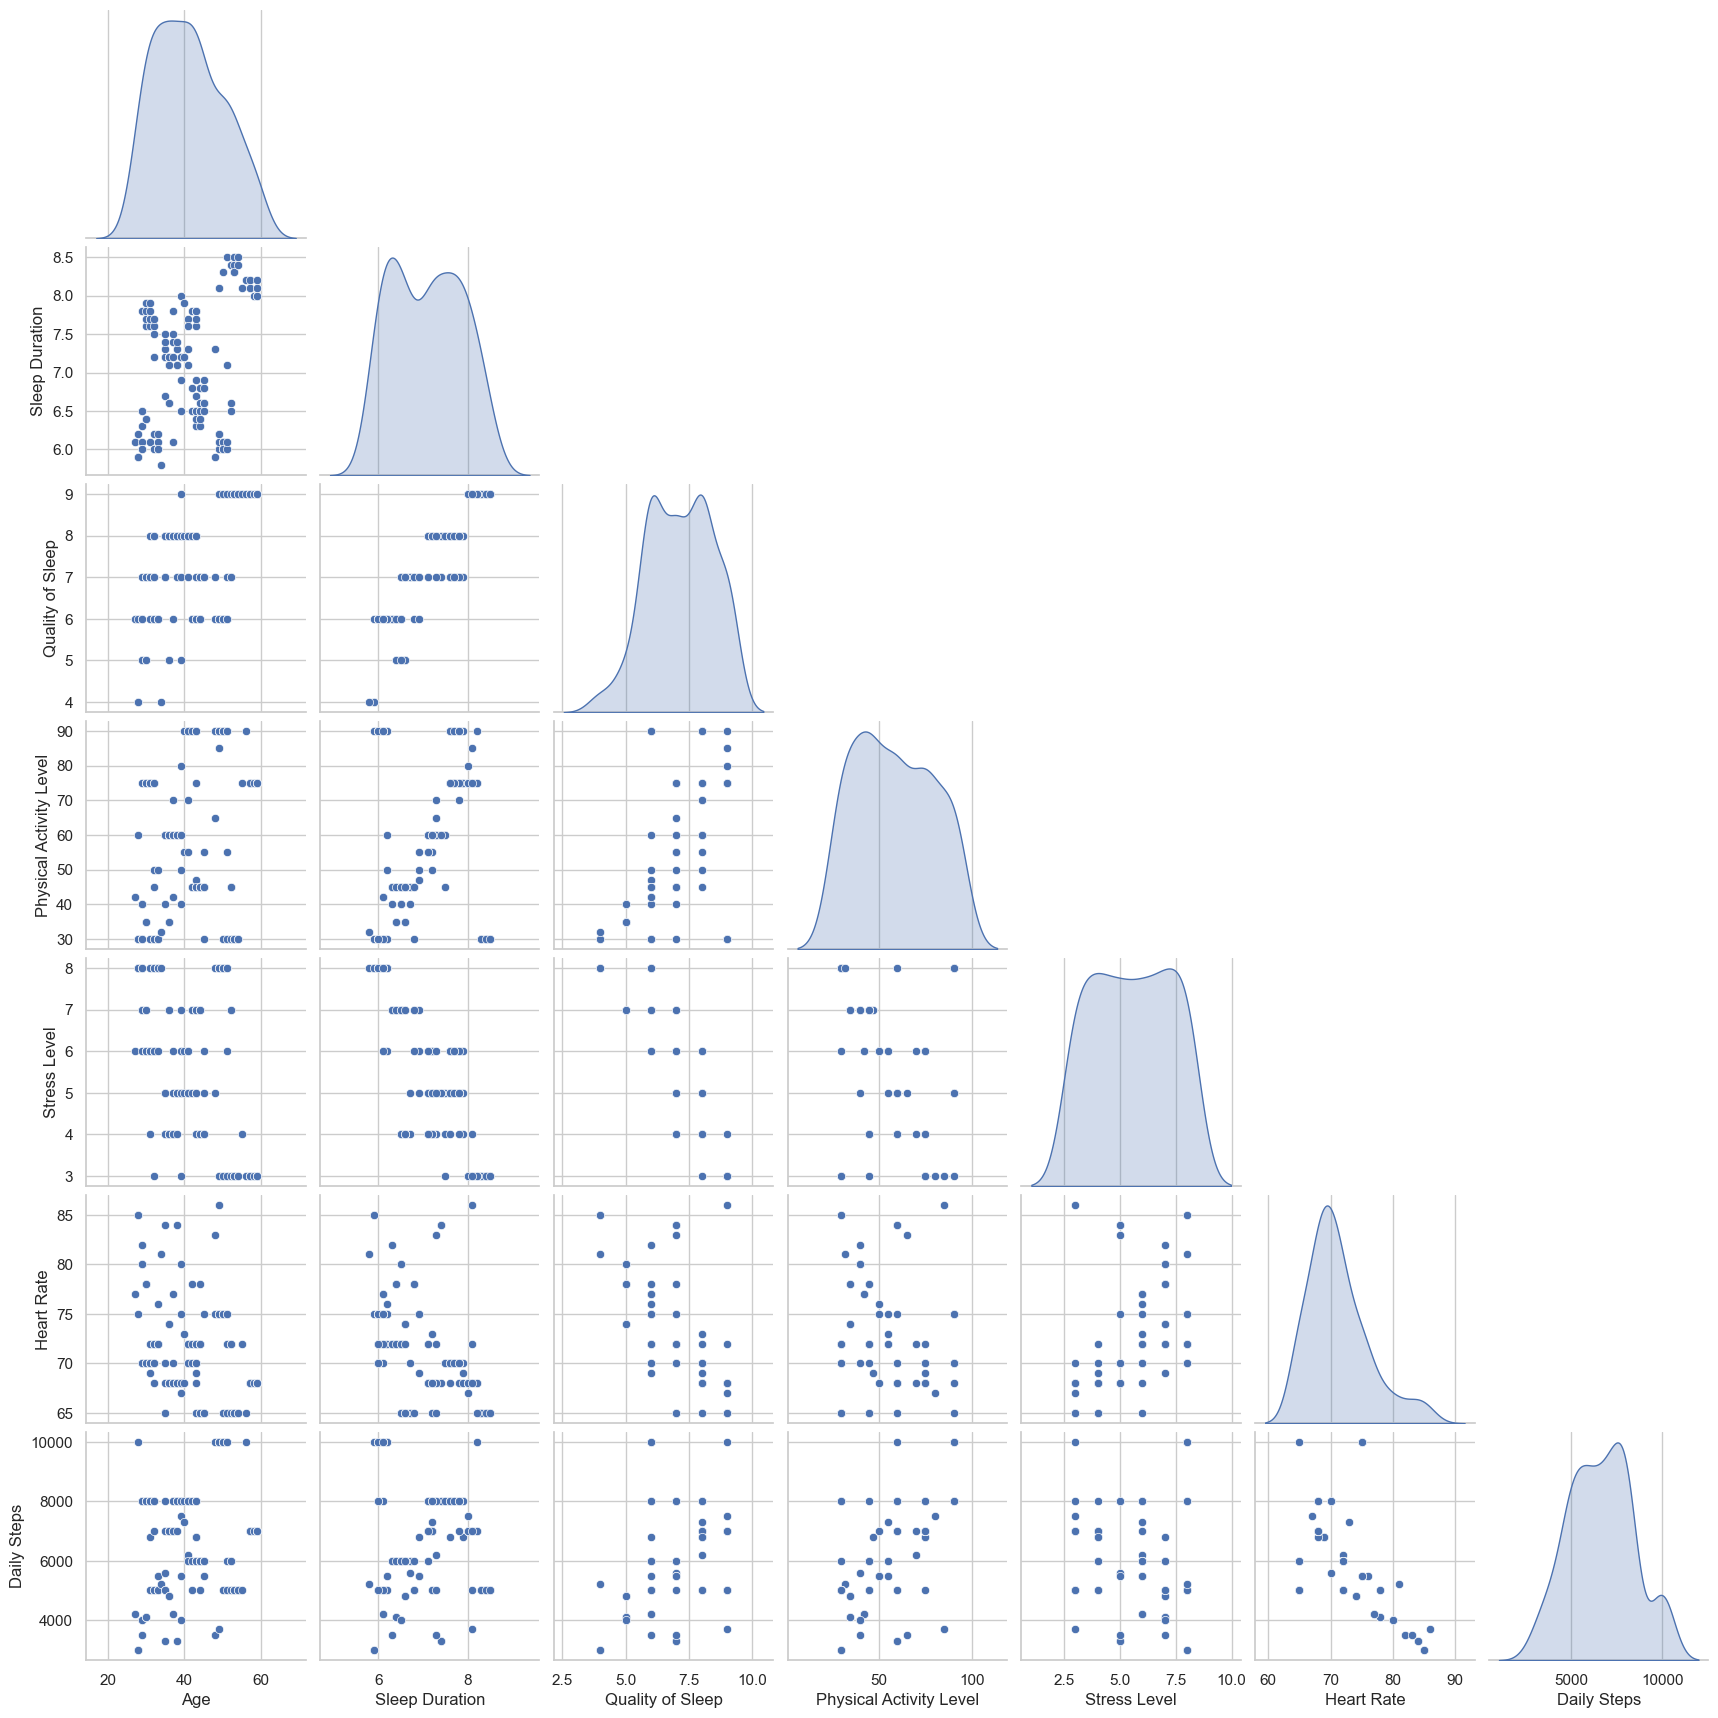

In [469]:
#Burada numeric sütunların bir birləri ilə arasındakı dağılıma baxırıq. 
plt.figure(figsize=(25,30))
sns.pairplot(df.select_dtypes(include = ["int64","float64"]),kind="scatter",corner=True,diag_kind="kde");

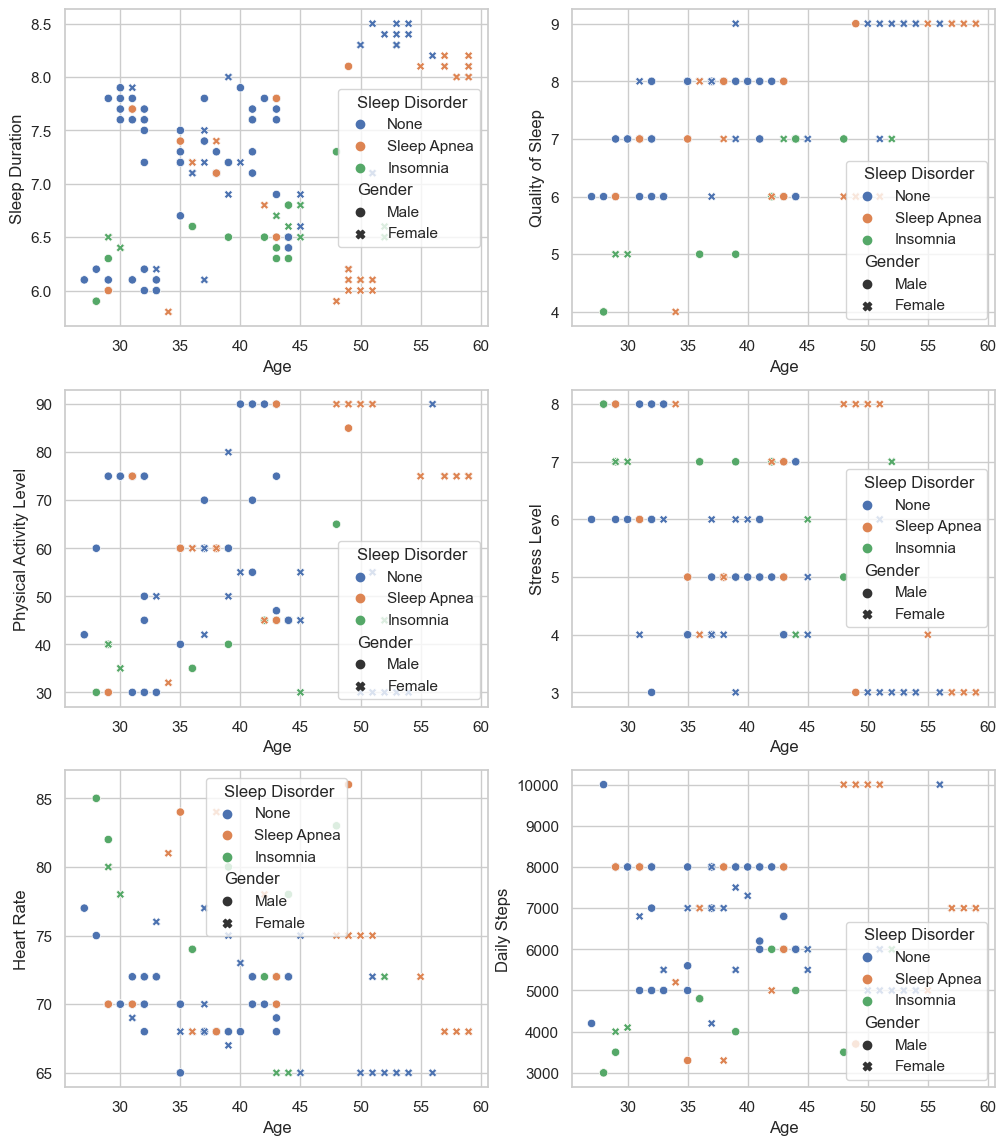

In [470]:
#Bu funskiya ilə hər bir numeric sütunun digər sütunlarla dağılımına baxırıq.Yuxu problemini və Cinsidə qrafikdə analiz edirik 
def scatter_plot(column):
    sns.set(style='whitegrid')
    fig, ax = plt.subplots(nrows=3,ncols=2,figsize = (12,14))
    i=0;j=0
    for col in df.select_dtypes(include = ["int64","float64"]):
        if i==2:
            j+=1
            i=0
        if col==column:
            continue
        sns.scatterplot(data = df,y = col,x=column,hue = "Sleep Disorder",ax = ax[j][i],style="Gender")
        i=i+1
#Age sütunun digər sütunlarla dağılımına baxırıq.Yuxu problemi və Cinsində qrafikdə analiz edirik 
scatter_plot("Age")

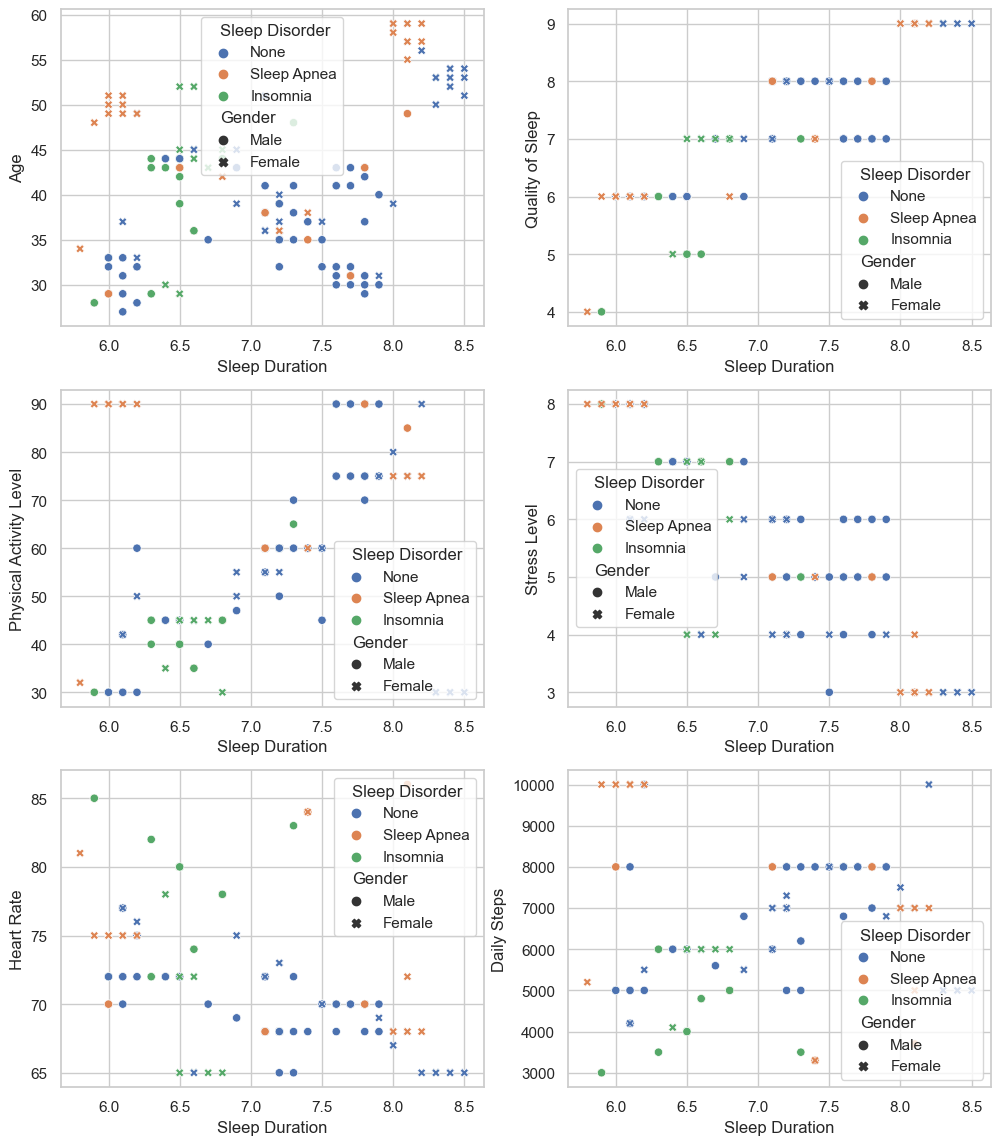

In [471]:
#Sleep Duration sütunun digər sütunlarla dağılımına baxırıq.Yuxu problemi və Cinsində qrafikdə analiz edirik 
scatter_plot("Sleep Duration")

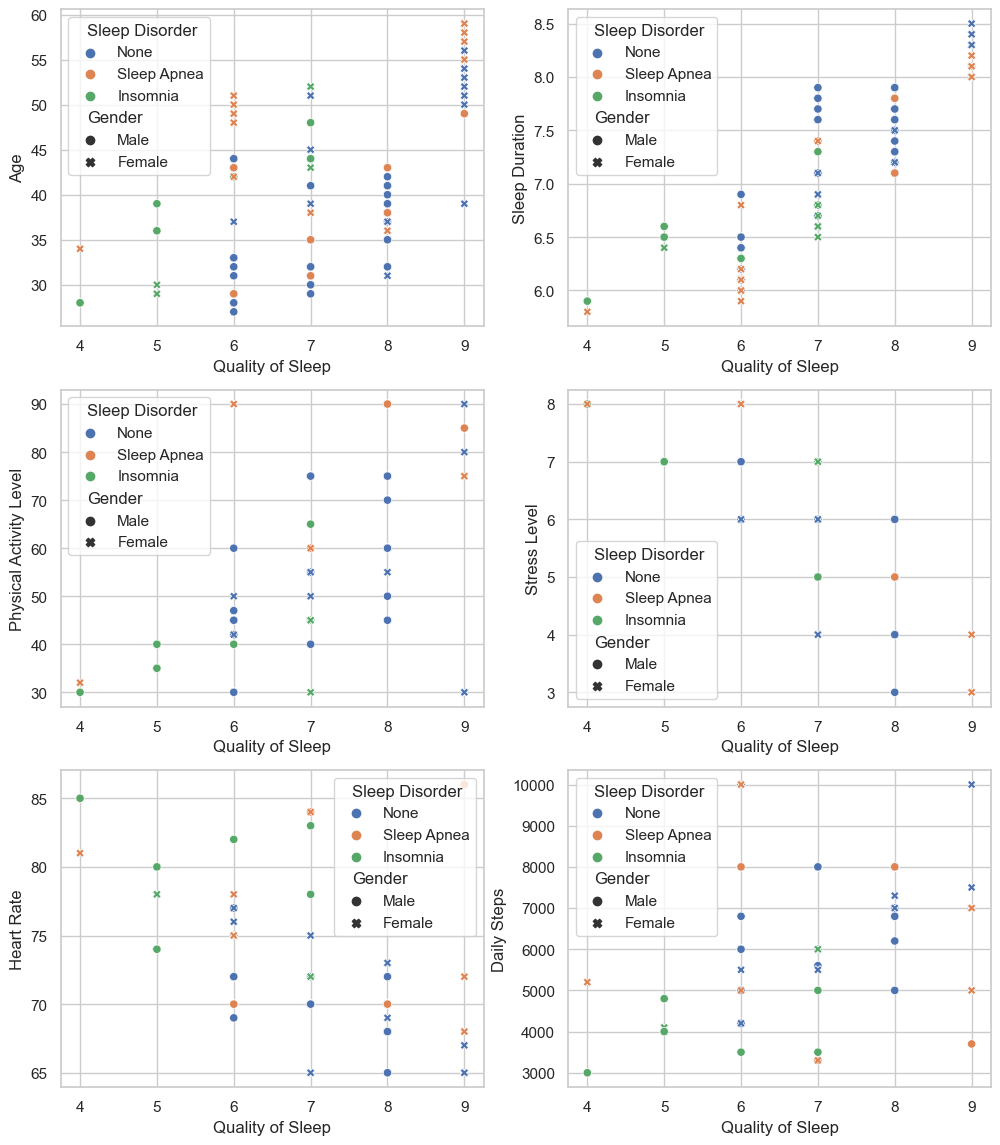

In [472]:
#Quality of Sleep sütunun digər sütunlarla dağılımına baxırıq.Yuxu problemi və Cinsində qrafikdə analiz edirik 
scatter_plot("Quality of Sleep")

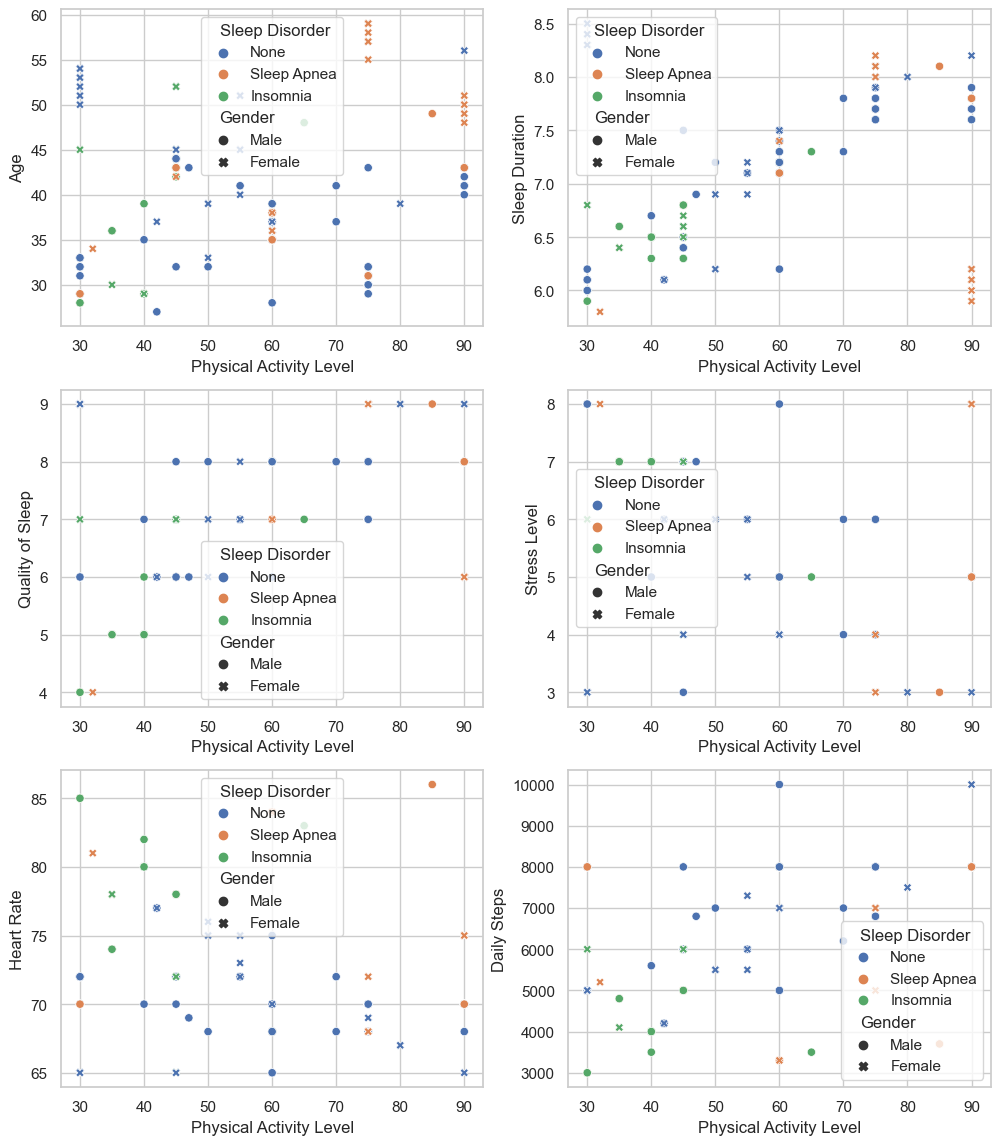

In [473]:
#Physical Activity Level sütunun digər sütunlarla dağılımına baxırıq.Yuxu problemi və Cinsində qrafikdə analiz edirik
scatter_plot("Physical Activity Level")

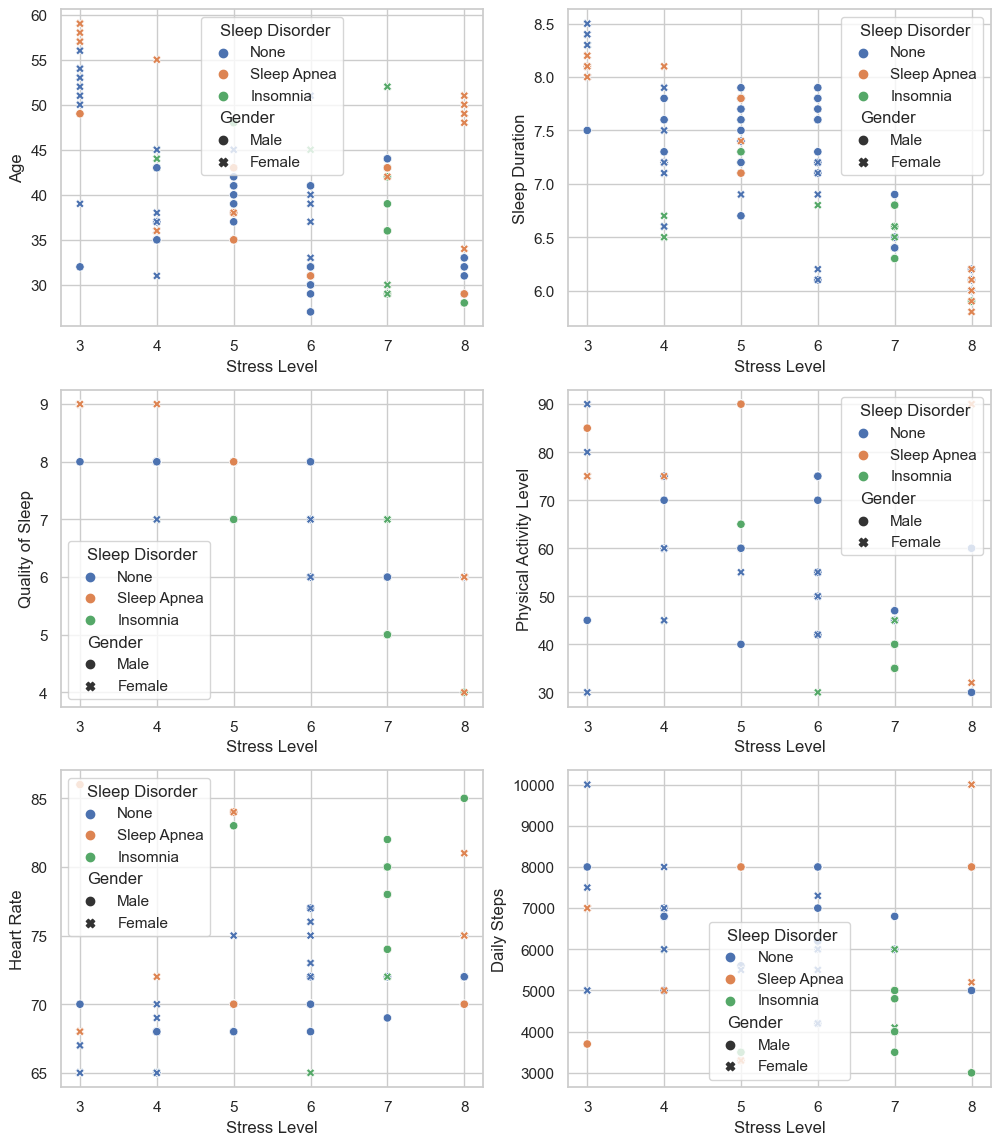

In [474]:
#Stress Level sütunun digər sütunlarla dağılımına baxırıq.Yuxu problemi və Cinsində qrafikdə analiz edirik
scatter_plot("Stress Level")

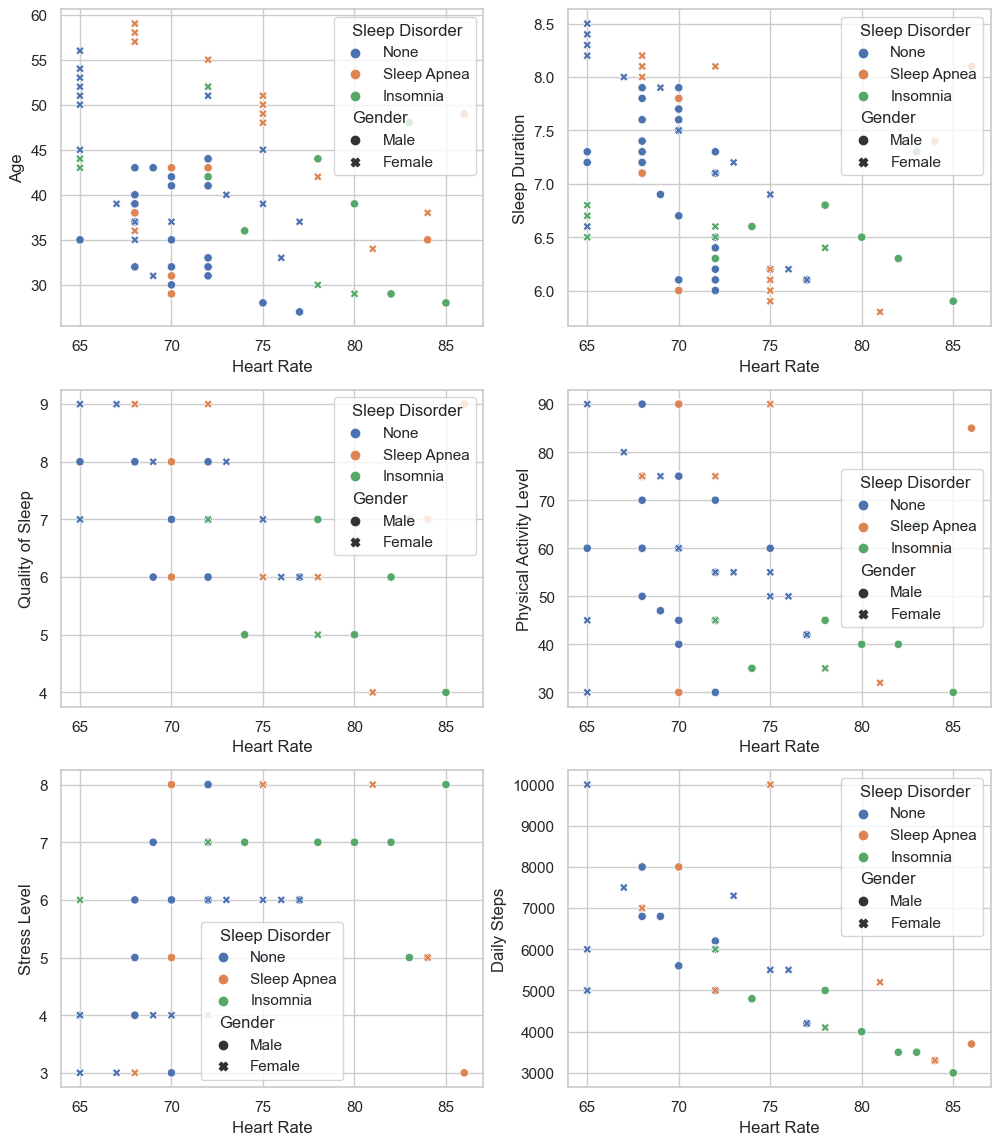

In [475]:
#Heart Rate sütunun digər sütunlarla dağılımına baxırıq.Yuxu problemi və Cinsində qrafikdə analiz edirik
scatter_plot("Heart Rate")

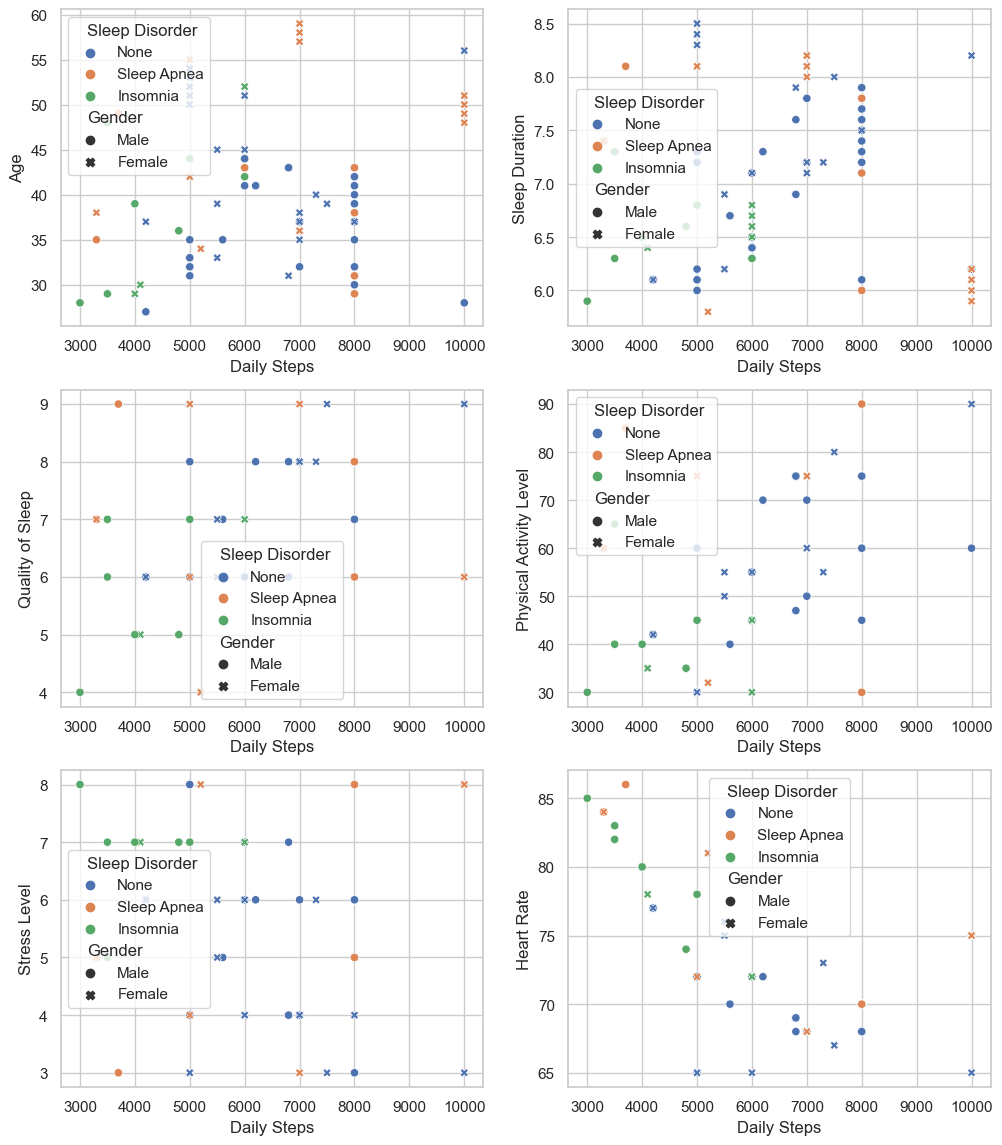

In [476]:
scatter_plot("Daily Steps")

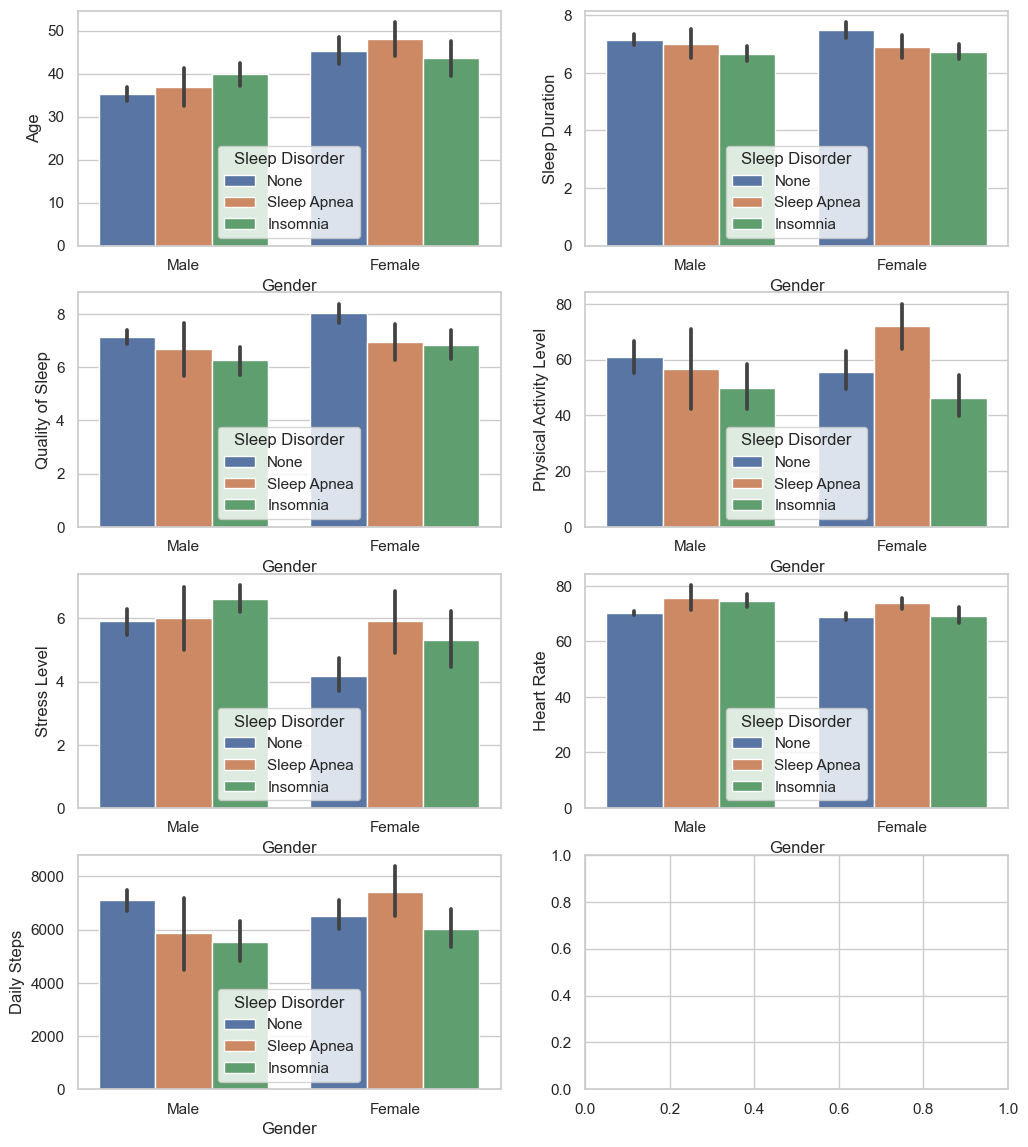

In [477]:
#Bu funksiiya ilə hər bir kateqoriya sütunun digər numeric sütunlarla bar qrafikini çəkdiririk.
#Yuxu pozuğunluğunu da bu qrafikdən analiz edirik.
def bar_plot(column):
    fig, ax = plt.subplots(nrows=4,ncols=2,figsize = (12,14))
    i=0;j=0
    for col in df.select_dtypes(include = ["int64","float64"]):
        if i==2:
            j+=1
            i=0
        if col==column:
            continue
        sns.barplot(data = df,x=column,y=col,hue = "Sleep Disorder",ax = ax[j][i])
        i=i+1
#Gender sütununu digər numeric sütunlarla bar qrafikini çəkdirir.
bar_plot("Gender")

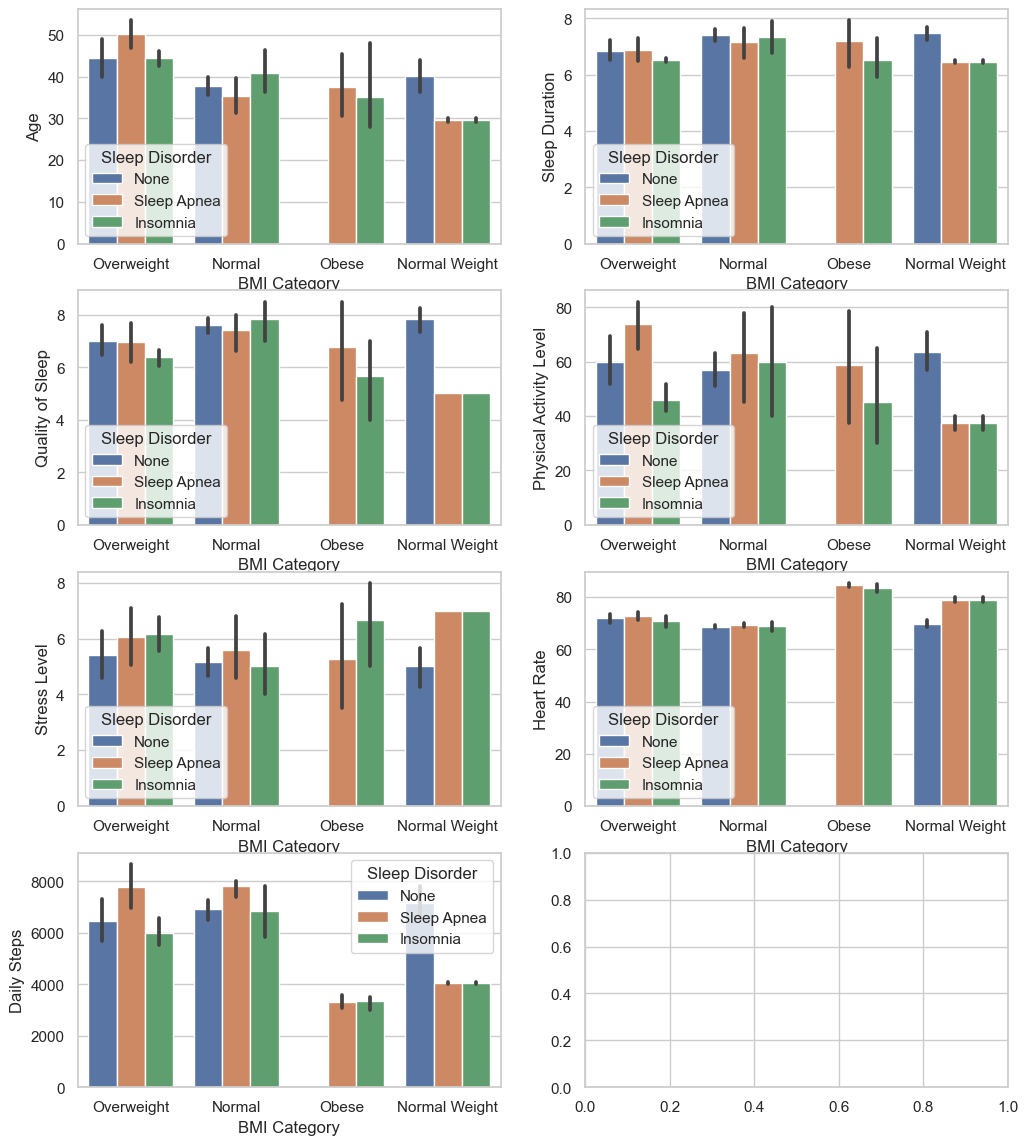

In [478]:
#BMI Category sütununu digər numeric sütunlarla bar qrafikini çəkdirir.
bar_plot("BMI Category")

## Datanın təmizlənməsi

In [479]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia


## Blood Pressure sütunu

In [480]:
#Qan təziqini numeric sütuna çeviririk.
df["Blood Pressure"] = df["Blood Pressure"].apply(lambda x : int(x.split("/")[0])/int(x.split("/")[1]))

In [481]:
df["Blood Pressure"][:10]

0     1.518072
1     1.562500
3     1.555556
5     1.555556
6     1.555556
7     1.500000
10    1.500000
13    1.500000
16    1.517241
17    1.500000
Name: Blood Pressure, dtype: float64

## Gender  sütunu

In [482]:
df.Gender.value_counts()

Male      67
Female    65
Name: Gender, dtype: int64

In [483]:
#Gender sütununu get_dummies vasitəsi ilə numeric dəyərlərə çeviririk.
df = pd.get_dummies(df,columns= ["Gender"],drop_first=True)

In [484]:
df.Gender_Male.value_counts()

1    67
0    65
Name: Gender_Male, dtype: int64

## Occupation sütunu

In [485]:
df.Occupation.value_counts()

Nurse                   29
Doctor                  24
Engineer                22
Teacher                 15
Lawyer                  15
Accountant              11
Salesperson              9
Software Engineer        3
Scientist                2
Sales Representative     1
Manager                  1
Name: Occupation, dtype: int64

In [486]:
#İnsanların işlədikləri vəzifəyə görə ən çox yuxu problemi olan şəxslərin işlərini müəyyən edirik
grup_op = df[["Occupation","Sleep Disorder"]][(df["Sleep Disorder"]=="Sleep Apnea") | (df["Sleep Disorder"]=="Insomnia")].value_counts()
grup_op

Occupation            Sleep Disorder
Nurse                 Sleep Apnea       17
Teacher               Insomnia           8
Salesperson           Insomnia           6
Engineer              Insomnia           4
Accountant            Insomnia           3
Doctor                Sleep Apnea        3
Lawyer                Sleep Apnea        3
Nurse                 Insomnia           3
Teacher               Sleep Apnea        3
Doctor                Insomnia           2
Lawyer                Insomnia           2
Engineer              Sleep Apnea        1
Sales Representative  Sleep Apnea        1
Salesperson           Sleep Apnea        1
Scientist             Sleep Apnea        1
Software Engineer     Insomnia           1
dtype: int64

In [487]:
grup_op = pd.DataFrame(grup_op,columns=["Tekrar"]).reset_index()
grup_op

,Occupation,Sleep Disorder,Tekrar
0,Nurse,Sleep Apnea,17
1,Teacher,Insomnia,8
2,Salesperson,Insomnia,6
3,Engineer,Insomnia,4
4,Accountant,Insomnia,3
5,Doctor,Sleep Apnea,3
6,Lawyer,Sleep Apnea,3
7,Nurse,Insomnia,3
8,Teacher,Sleep Apnea,3
9,Doctor,Insomnia,2


In [488]:
grup_op = grup_op.groupby(["Occupation"])[["Tekrar"]].sum().reset_index()
grup_op

,Occupation,Tekrar
0,Accountant,3
1,Doctor,5
2,Engineer,5
3,Lawyer,5
4,Nurse,20
5,Sales Representative,1
6,Salesperson,7
7,Scientist,1
8,Software Engineer,1
9,Teacher,11


In [489]:
faiz=[]
for i,value in enumerate(grup_op["Occupation"]):
    faiz.append(grup_op.iloc[i][1]/df["Occupation"].value_counts()[value])

In [490]:
grup_op["faiz"]=faiz

In [491]:
grup_op

,Occupation,Tekrar,faiz
0,Accountant,3,0.272727
1,Doctor,5,0.208333
2,Engineer,5,0.227273
3,Lawyer,5,0.333333
4,Nurse,20,0.689655
5,Sales Representative,1,1.000000
6,Salesperson,7,0.777778
7,Scientist,1,0.500000
8,Software Engineer,1,0.333333
9,Teacher,11,0.733333


In [492]:
#Ən çox yuxu problemi yaşayan işlərə bir digərlərinə 0 deyirik. 
df["Occupation_New"] = [1 if (value =="Nurse") or (value=="Teacher") or (value=="Salesperson") else 0\
                    for value in df["Occupation"] ]

In [493]:
df["Occupation_New"].value_counts()

0    79
1    53
Name: Occupation_New, dtype: int64

In [494]:
df.drop(columns = ["Occupation"],axis = 1,inplace = True)

In [495]:
df.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Gender_Male,Occupation_New
0,27,6.1,6,42,6,Overweight,1.518072,77,4200,None,1,0
1,28,6.2,6,60,8,Normal,1.562500,75,10000,None,1,0
3,28,5.9,4,30,8,Obese,1.555556,85,3000,Sleep Apnea,1,0
5,28,5.9,4,30,8,Obese,1.555556,85,3000,Insomnia,1,0
6,29,6.3,6,40,7,Obese,1.555556,82,3500,Insomnia,1,1


## BMI Category sütunu

In [496]:
df["BMI Category"].value_counts()

Normal           57
Overweight       52
Normal Weight    16
Obese             7
Name: BMI Category, dtype: int64

In [497]:
#İnsanların BMI görə ən çox yuxu problemi olan qrupu müəyyən edirik
grup_bmi = df[["BMI Category","Sleep Disorder"]][(df["Sleep Disorder"]=="Sleep Apnea") | (df["Sleep Disorder"]=="Insomnia")].value_counts()
grup_bmi

BMI Category   Sleep Disorder
Overweight     Sleep Apnea       19
               Insomnia          18
Normal         Insomnia           6
               Sleep Apnea        5
Obese          Sleep Apnea        4
               Insomnia           3
Normal Weight  Insomnia           2
               Sleep Apnea        2
dtype: int64

In [498]:
grup_bmi = pd.DataFrame(grup_bmi,columns=["Tekrar"]).reset_index()
grup_bmi

,BMI Category,Sleep Disorder,Tekrar
0,Overweight,Sleep Apnea,19
1,Overweight,Insomnia,18
2,Normal,Insomnia,6
3,Normal,Sleep Apnea,5
4,Obese,Sleep Apnea,4
5,Obese,Insomnia,3
6,Normal Weight,Insomnia,2
7,Normal Weight,Sleep Apnea,2


In [500]:
grup_bmi = grup_bmi.groupby(["BMI Category"])[["Tekrar"]].sum().reset_index()
grup_bmi

,BMI Category,Tekrar
0,Normal,11
1,Normal Weight,4
2,Obese,7
3,Overweight,37


In [508]:
faiz=[]
for i,value in enumerate(grup_bmi["BMI Category"]):
    faiz.append(grup_bmi.iloc[i][1]/df["BMI Category"].value_counts()[value])

In [511]:
#Buardan görünürki yuxu problemi ən çox ola biləcək insanlar  Obese,Overweight,Normal Weight,Normal bu ardıcılıqla dəvam edir.
grup_bmi["faiz"]=faiz
grup_bmi

,BMI Category,Tekrar,faiz
0,Normal,11,0.192982
1,Normal Weight,4,0.250000
2,Obese,7,1.000000
3,Overweight,37,0.711538


In [512]:
#Buarda OrdinalEncoder vastəsi ilə sıralı şəkilə numeric dəyərlərə çeviririk.
category = list(["Normal","Normal Weight","Overweight","Obese"])
oe = OrdinalEncoder(categories=[category])
df["BMI Category_New"] = oe.fit_transform(df["BMI Category"].values.reshape(-1,1))

In [513]:
df["BMI Category_New"].value_counts()

0.0    57
2.0    52
1.0    16
3.0     7
Name: BMI Category_New, dtype: int64

In [514]:
#Buarda "BMI Category" sütununu atırıq.
df.drop(columns = ["BMI Category"],axis = 1,inplace=True)

In [515]:
df.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Gender_Male,Occupation_New,BMI Category_New
0,27,6.1,6,42,6,1.518072,77,4200,None,1,0,2.0
1,28,6.2,6,60,8,1.562500,75,10000,None,1,0,0.0
3,28,5.9,4,30,8,1.555556,85,3000,Sleep Apnea,1,0,3.0
5,28,5.9,4,30,8,1.555556,85,3000,Insomnia,1,0,3.0
6,29,6.3,6,40,7,1.555556,82,3500,Insomnia,1,1,3.0


## Sleep Disorder sütunu

In [516]:
#Sleep Disorder sütununu LabelEncoder edərək Numeric dəyərlərə çeviririk.
df["Sleep Disorder"].value_counts()

None           73
Sleep Apnea    30
Insomnia       29
Name: Sleep Disorder, dtype: int64

In [517]:
le = LabelEncoder()
df["Sleep Disorder"] = le.fit_transform(df["Sleep Disorder"])

In [518]:
df["Sleep Disorder"].value_counts()

1    73
2    30
0    29
Name: Sleep Disorder, dtype: int64

In [519]:
df.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Gender_Male,Occupation_New,BMI Category_New
0,27,6.1,6,42,6,1.518072,77,4200,1,1,0,2.0
1,28,6.2,6,60,8,1.562500,75,10000,1,1,0,0.0
3,28,5.9,4,30,8,1.555556,85,3000,2,1,0,3.0
5,28,5.9,4,30,8,1.555556,85,3000,0,1,0,3.0
6,29,6.3,6,40,7,1.555556,82,3500,0,1,1,3.0


## Outlier-lərin təmizlənməsi

<Axes: >

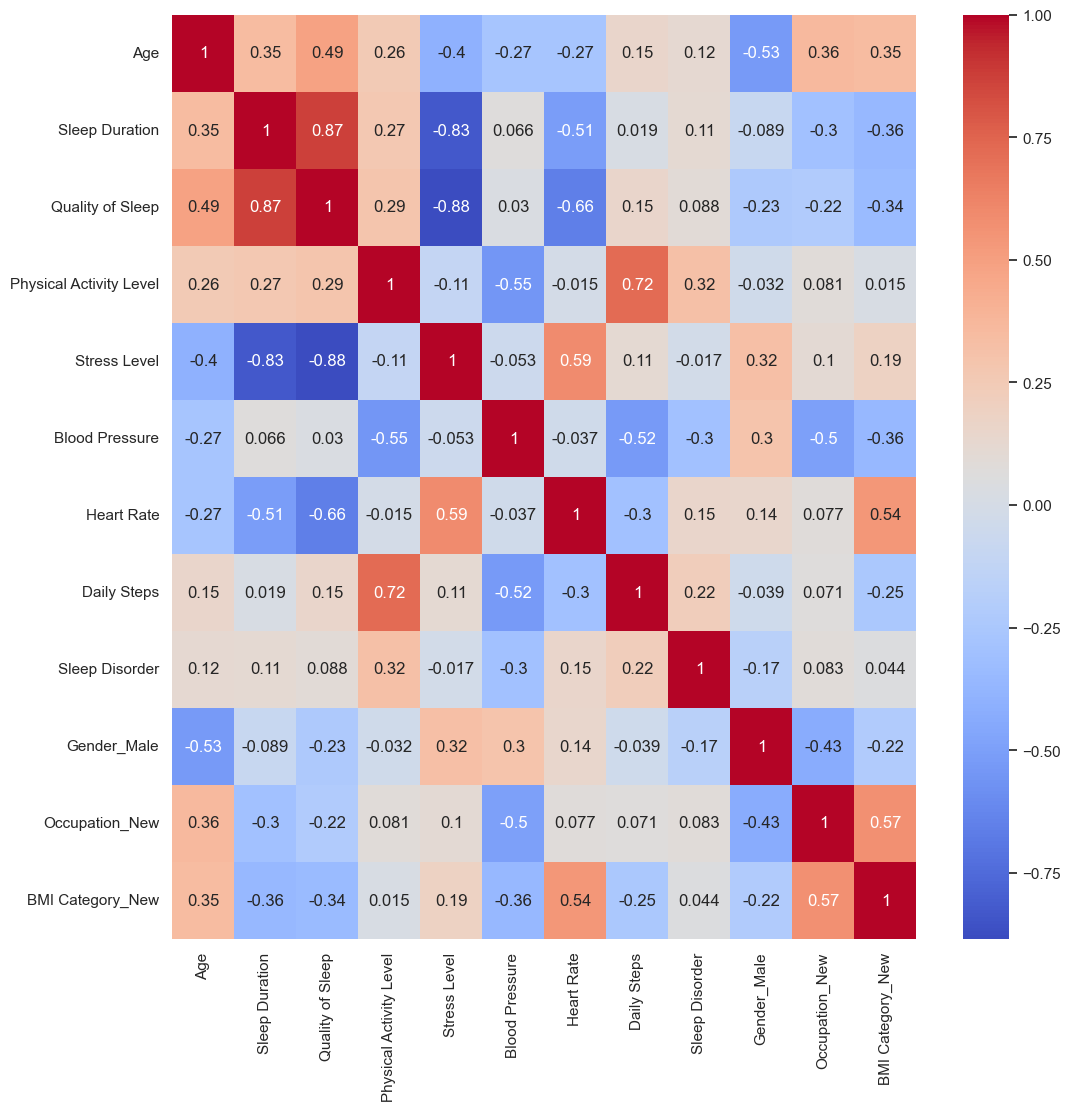

In [520]:
#Numeric sütunlar arasındakı Korelasyona baxırıq.
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

In [521]:
#Sleep Disorder sütunu ilə digər Numeric sütunlar arasındakı Korelasyona baxırıq.
df.corr()[["Sleep Disorder"]]

,Sleep Disorder
Age,0.121151
Sleep Duration,0.110292
Quality of Sleep,0.088280
Physical Activity Level,0.318777
Stress Level,-0.016588
Blood Pressure,-0.299460
Heart Rate,0.146759
Daily Steps,0.224522
Sleep Disorder,1.000000
Gender_Male,-0.170175


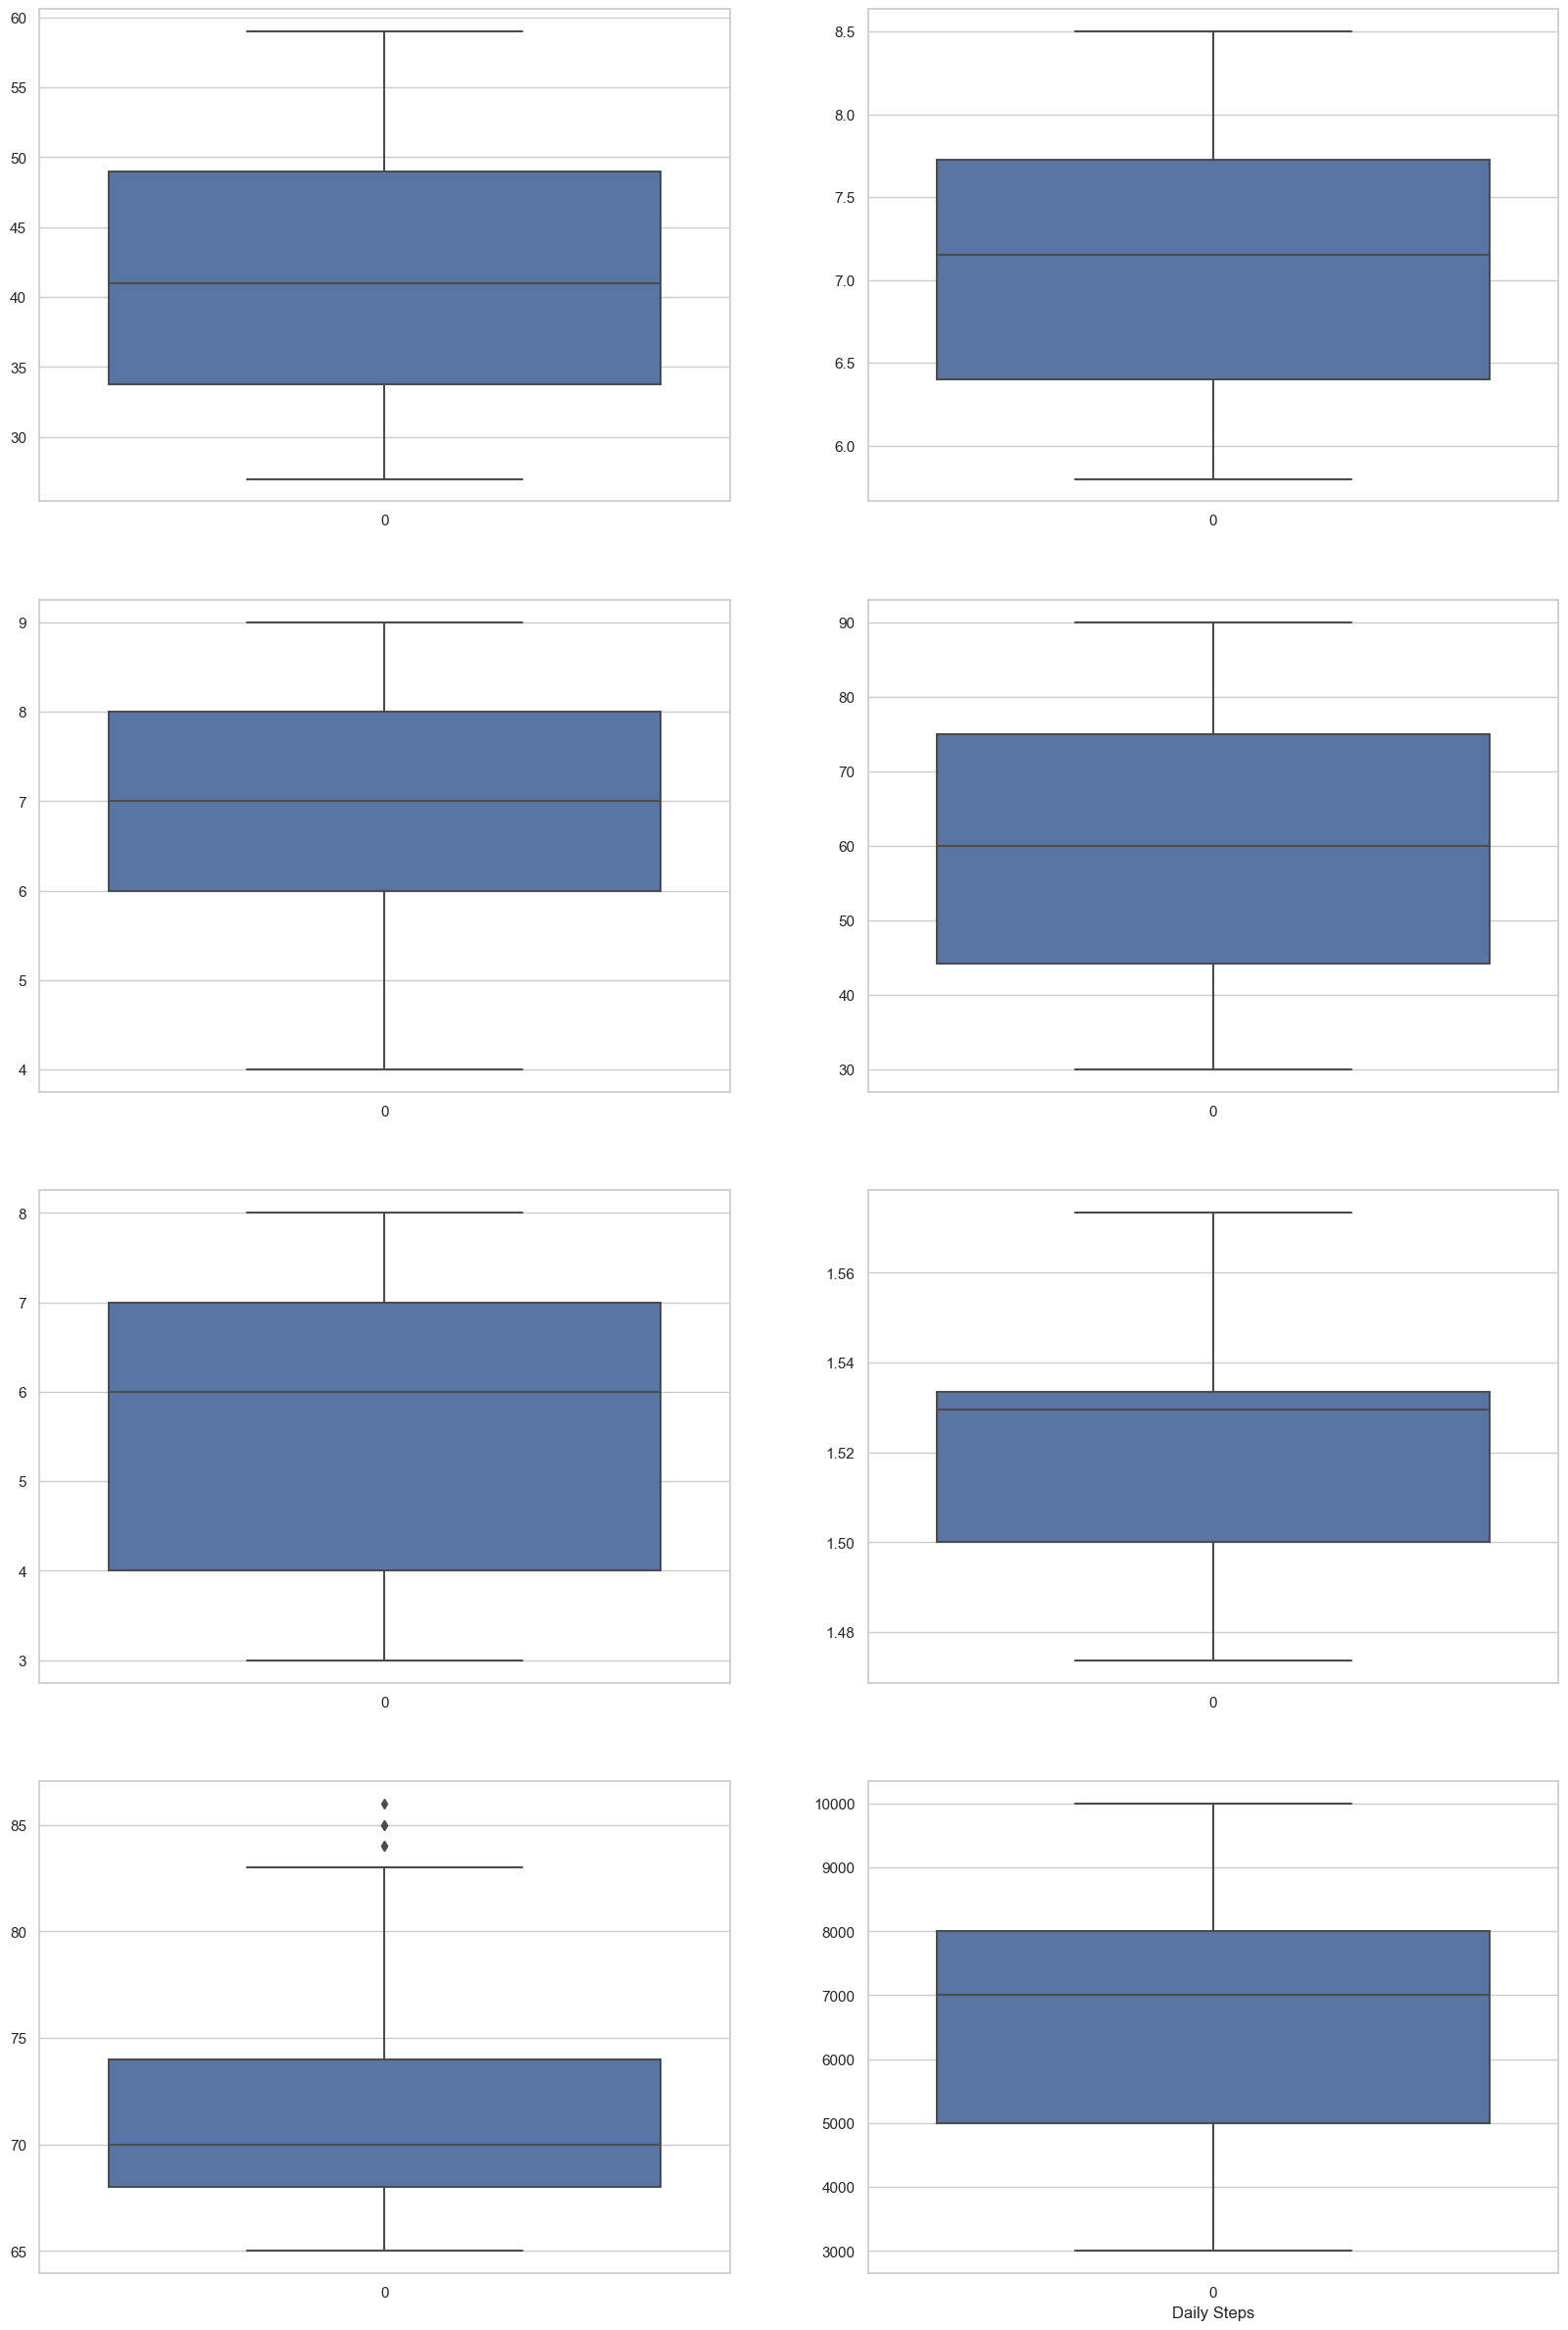

In [522]:
#Bu funksiya Bütün Numeric sütunarın Box qrafikini çəkdirir.
def box_plot():
    fig, ax = plt.subplots(nrows=4,ncols=2,figsize = (20,30))
    i=0;j=0
    for col in df.columns[:8]:
        if i==2:
            j+=1
            i=0
        sns.boxplot(df[col],ax = ax[j][i])
        plt.xlabel(xlabel  = col)
        i=i+1
box_plot()

In [523]:
#Bu funksiya Numeric sütunlara bir bir baxaraq oradakı Outlier-ləri təmizləyir
def outlier_cleaning(data):
    for col in data.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = (Q3-Q1)*1.5
        lower = Q1 - IQR
        upper = Q3 + IQR
        df[col] = df[col].apply(lambda x:lower if x<lower else x)
        df[col] = df[col].apply(lambda x:upper if x>upper else x)

In [524]:
outlier_cleaning(df.loc[:,"Age":"Daily Steps"])

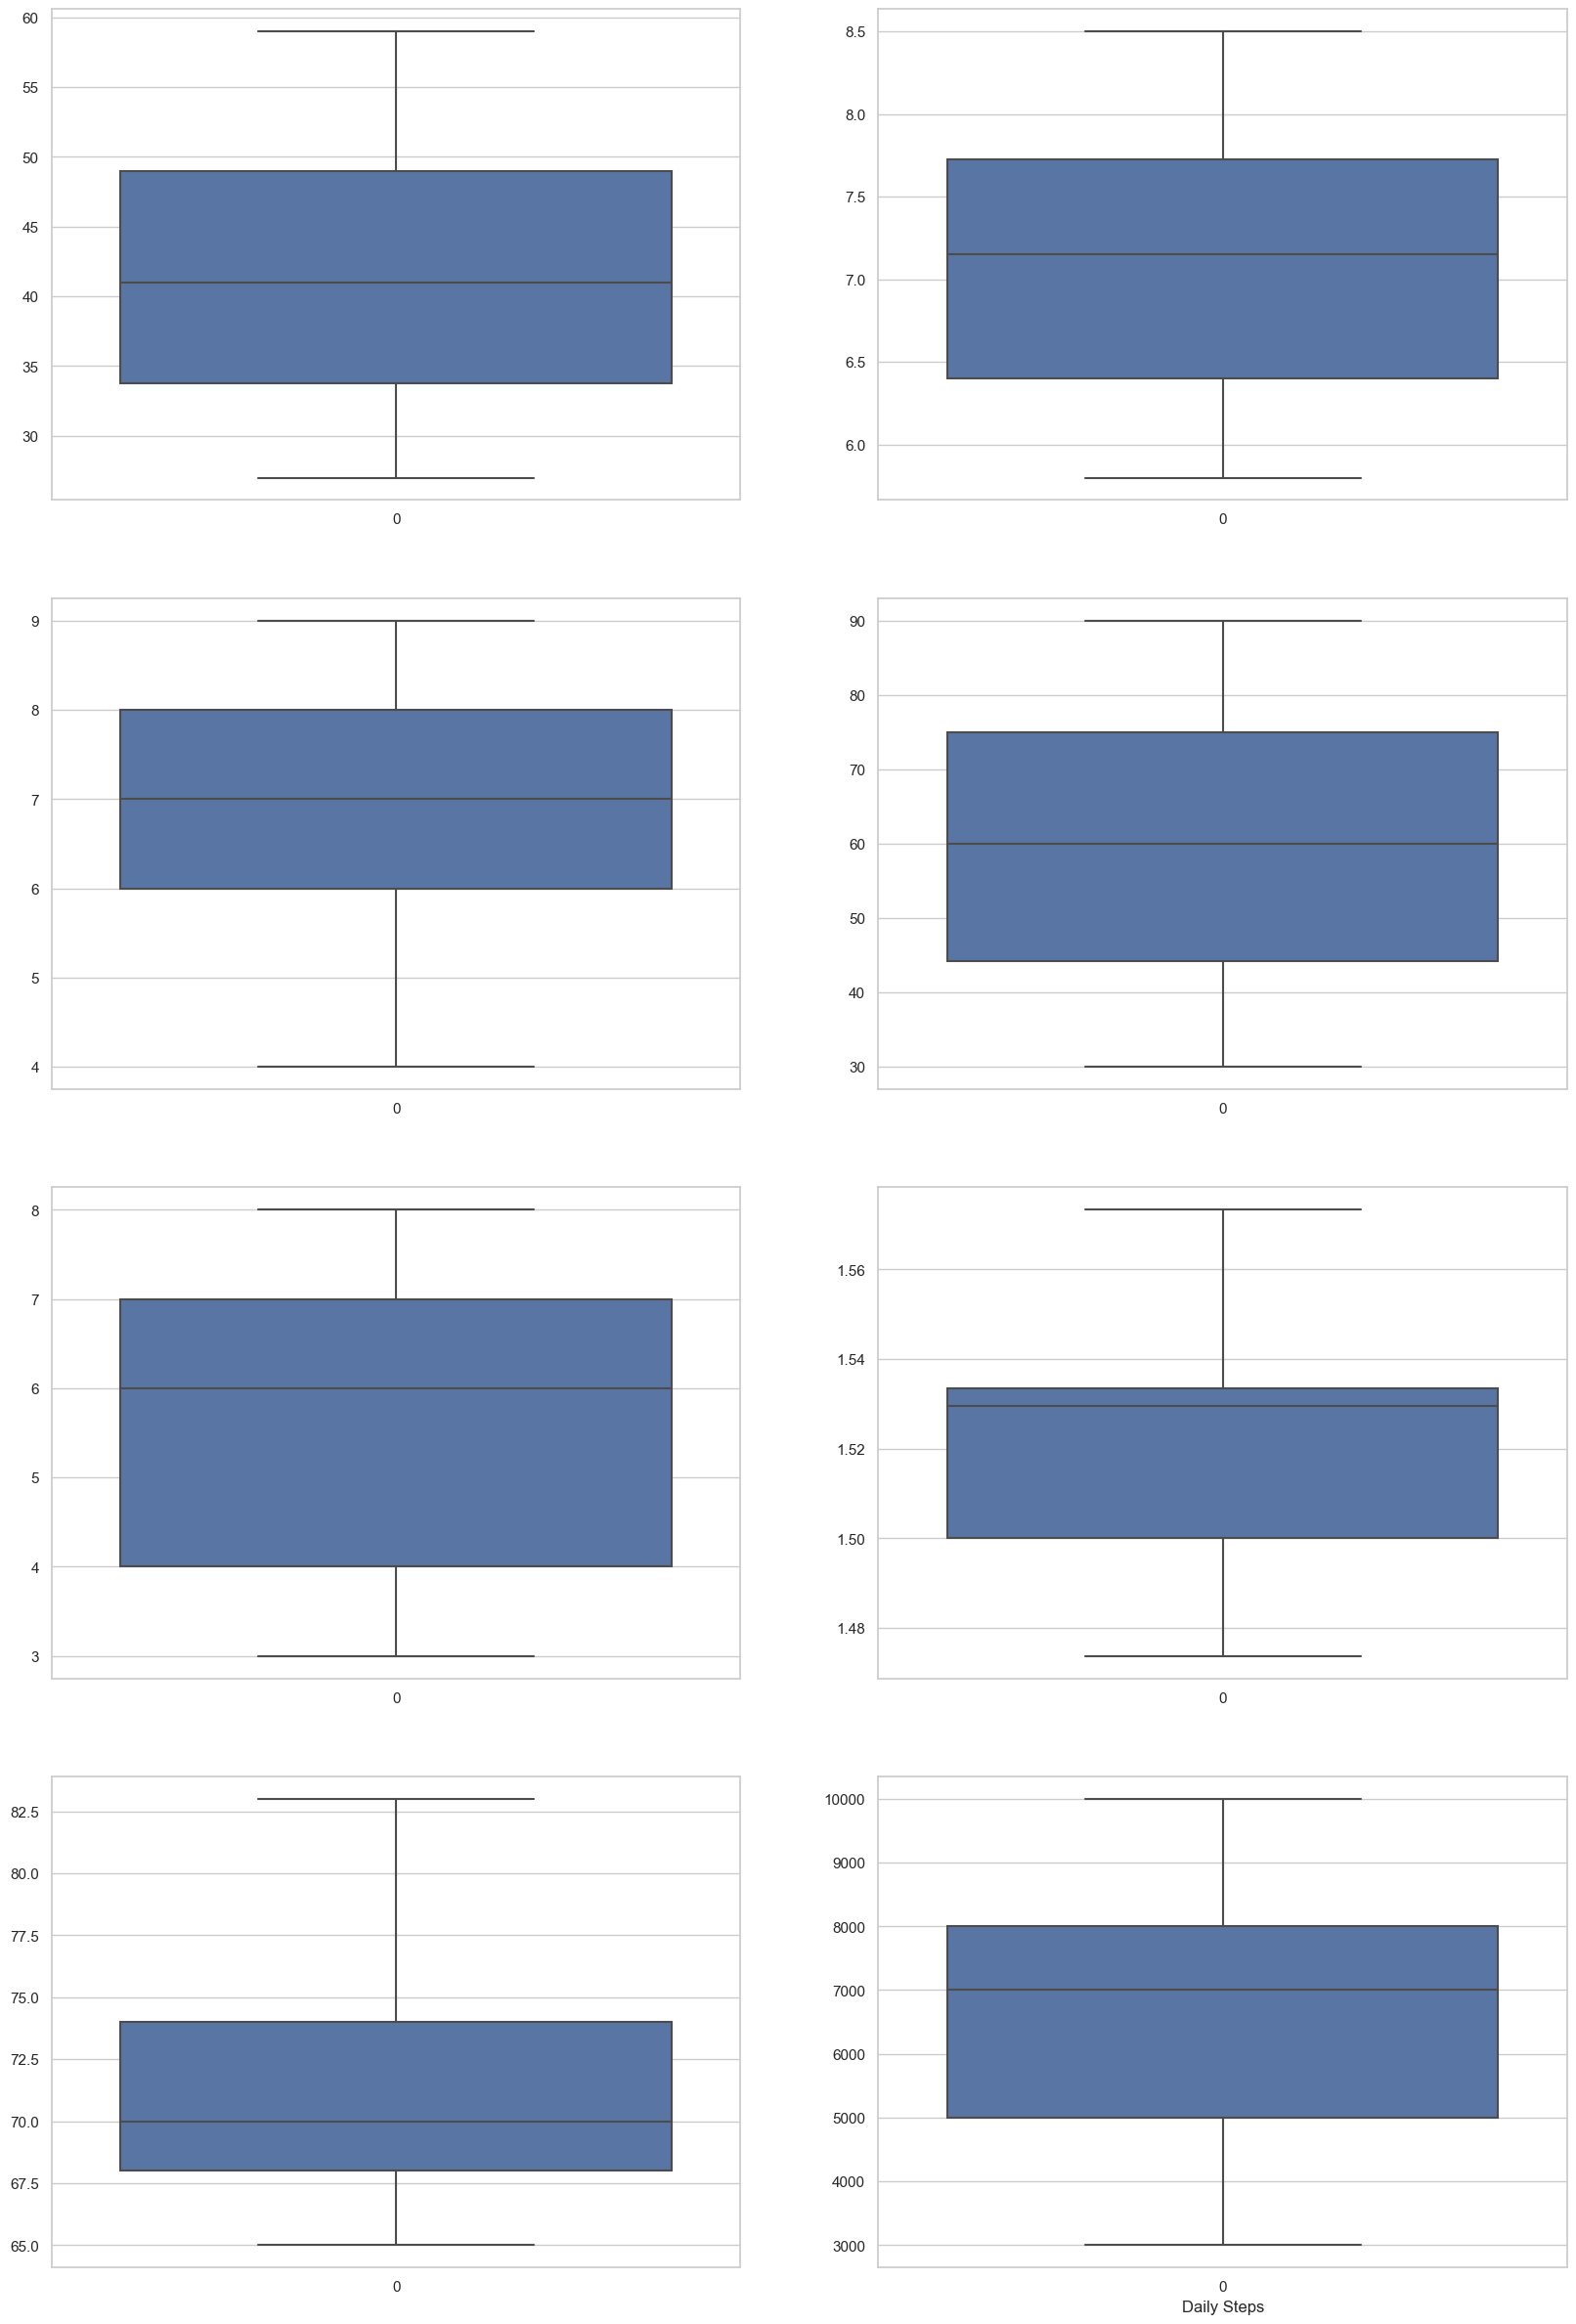

In [525]:
box_plot()

## Modeli Train və Testə ayırmaq

In [526]:
X = df.drop(columns  = ["Sleep Disorder"],axis = 1)
y = df["Sleep Disorder"]

In [527]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Train ve Testi standartlaşdırmaq.

In [528]:
std = StandardScaler()

In [529]:
X_train = std.fit_transform(X_train)
X_test = std.fit_transform(X_test)

## Ən yaxşı modeli seçmək

In [530]:
parametrler = {"RFC":RandomForestClassifier(n_estimators=50,max_features=5),
              "DTC":DecisionTreeClassifier(max_features=3,max_leaf_nodes=20,min_samples_split=20),
              "Bgtree":BaggingClassifier(),
              "KNN":KNeighborsClassifier(n_neighbors=10),
              "LOG":LogisticRegression(C=1)
              }

In [531]:
# Bu funksiya tuning olunmamış Modellər içərisində accuracy skoru ən yaxşı olan modeli göstərir.
def model_tunnig(parametrler,X_train,y_train):
    def best_model(name,model):
        kfold = KFold(n_splits=10, random_state=42,shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
        print({name:cv_results.mean()})
    for name,model in parametrler.items():
        best_model(name,model)

In [532]:
#Bu halda ən yaxşı Model Logistic Regression üçün qurulacaq. 
model_tunnig(parametrler,X_train,y_train)

{'RFC': 0.6454545454545454}
{'DTC': 0.7118181818181817}
{'Bgtree': 0.6272727272727272}
{'KNN': 0.6845454545454545}
{'LOG': 0.7418181818181818}


## Logistic Regression Model Tuning

In [533]:
log  = LogisticRegression()
params = {"penalty":["l1", "l2", "elasticnet", None],
          "tol":np.linspace(0,1,100),
          "C":np.arange(1,10)}

In [534]:
kfold = KFold(n_splits=10, random_state=42,shuffle=True)
grid = GridSearchCV(estimator=log,param_grid=params,cv=kfold)

In [535]:
grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'tol': array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.1...
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747475,
       0.75757576, 0.76767677, 0.77777778, 0.78787879, 0.7979798 ,
       0.80808081, 0.81818182, 0.82828283, 0.83838384, 0.84848485,
       0.85858586, 0.86868687, 0.87878788, 0.88888889, 0.8989899 ,
       0.90909091, 0.91919192, 0.92929293, 0.93939394, 0.94949495,
       0.95959596, 0.96969697, 0.97979798, 0.98989899, 1.        ])})

In [536]:
grid.best_params_

{'C': 1, 'penalty': 'l2', 'tol': 0.37373737373737376}

In [537]:
log  = LogisticRegression(penalty="l2",C=2,tol=0.9090909090909092)
model = log.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [538]:
confusion_matrix(y_pred,y_test)

array([[ 2,  1,  1],
       [ 2, 14,  1],
       [ 2,  3,  1]], dtype=int64)

In [539]:
accuracy_score(y_pred,y_test)

0.6296296296296297

In [540]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.33      0.50      0.40         4
           1       0.78      0.82      0.80        17
           2       0.33      0.17      0.22         6

    accuracy                           0.63        27
   macro avg       0.48      0.50      0.47        27
weighted avg       0.61      0.63      0.61        27



In [541]:
confusion_matrix(y_test,y_pred)

array([[ 2,  2,  2],
       [ 1, 14,  3],
       [ 1,  1,  1]], dtype=int64)

## Sətir sayı 132 olduğundan modelin göstəriciləri aşağıdır